## CNN
A Convolutional Neural Network (CNN) is a type of deep learning model designed to process and analyze images. It's especially good at recognizing patterns, like edges, shapes, textures, and objects in images.

### Why CNNs?
When you look at a photo, you instantly recognize objects, like "this is a cat" or "this is a car." Computers need a way to "see" and understand images, and CNNs help them do that by mimicking how the human brain processes visual information.

### Components of a CNN
1. Input Layer: Takes in the raw image as input. For example, in our case, an MNIST image is a 28x28 grayscale image, so each pixel value (0 to 255) is fed into the CNN.

2. Convolutional Layer:
- This layer is like a filter that scans small parts of the image (e.g., a 3x3 grid).
- It identifies patterns like edges, lines, or corners.
- Each filter creates a "feature map" that highlights certain patterns from the image.

3. Activation Function (ReLU): Applies a rule to keep only positive values (and set negatives to zero). This helps the network focus on useful patterns.

4. Pooling Layer:
- This reduces the size of the feature map while keeping important information. Think of it as summarizing the data to make processing faster.
- For example, it might reduce a 4x4 map to 2x2 by keeping the largest value in each section (this is called MaxPooling).

5. Flatten Layer: Once the features are extracted, they are flattened into a 1D vector (like a long list of numbers). This prepares the data for the final classification.

6. Dense (Fully Connected) Layer: These layers are like decision-makers. They take the flattened data and learn to associate patterns with specific labels (e.g., digits 0–9 in MNIST).

7. Output Layer: This is the final layer where predictions are made. It outputs probabilities for each class (e.g., how likely the image is of digit 0, 1, etc.).

## Analogy: CNN is Like a Detective
- Convolutional Layer: Scans small areas of the image for clues (edges, shapes).
- Pooling Layer: Keeps only the most important clues.
- Dense Layer: Uses all the clues to decide what’s in the image.

## TensorFlow with Keras for Advanced Models
Keras provides higher-level APIs for building complex models, including Recurrent Neural Networks (RNNs), Convolutional Neural Networks (CNNs), and custom layers.

Example (Simple Convolutional Neural Network for Image Classification):
python
Copy


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [21]:
#  Load the MNIST dataset. It has 60,000 images for training and 10,000 images for testing.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the dataset
print(f"x_train shape: {x_train.shape}")  # (60000, 28, 28). 
print(f"y_train shape: {y_train.shape}")  # (60000,)
print(f"x_test shape: {x_test.shape}")    # (10000, 28, 28)
print(f"y_test shape: {y_test.shape}")    # (10000,)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


(28, 28)
--------------------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

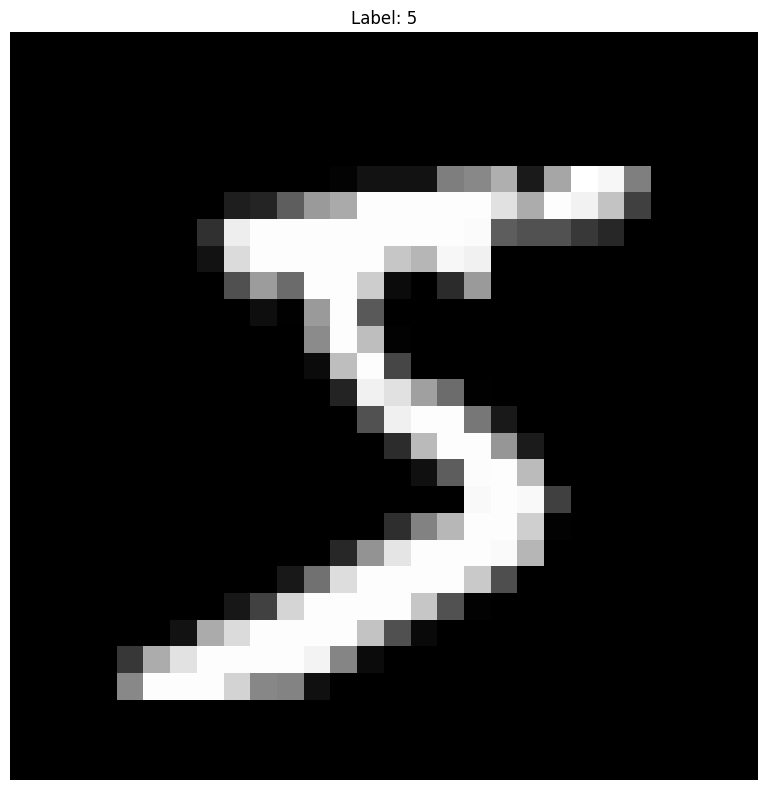

In [22]:
# Lets look at the first image data and also plot it. We are trybing to understand the image data
img_idx=0

print(x_train[img_idx].shape)
print("--------------------")
np.set_printoptions(linewidth=150, precision=2, suppress=True)  # Adjust formatting
print(x_train[img_idx])
print("*********************")
plt.figure(figsize=(8,8))  # Set the figure size

plt.imshow(x_train[img_idx],
           cmap='gray' # # Display the image in grayscale. comment it out if u want to see color
)  
plt.title(f"Label: {y_train[img_idx]}")  # Set the title as the label
plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()

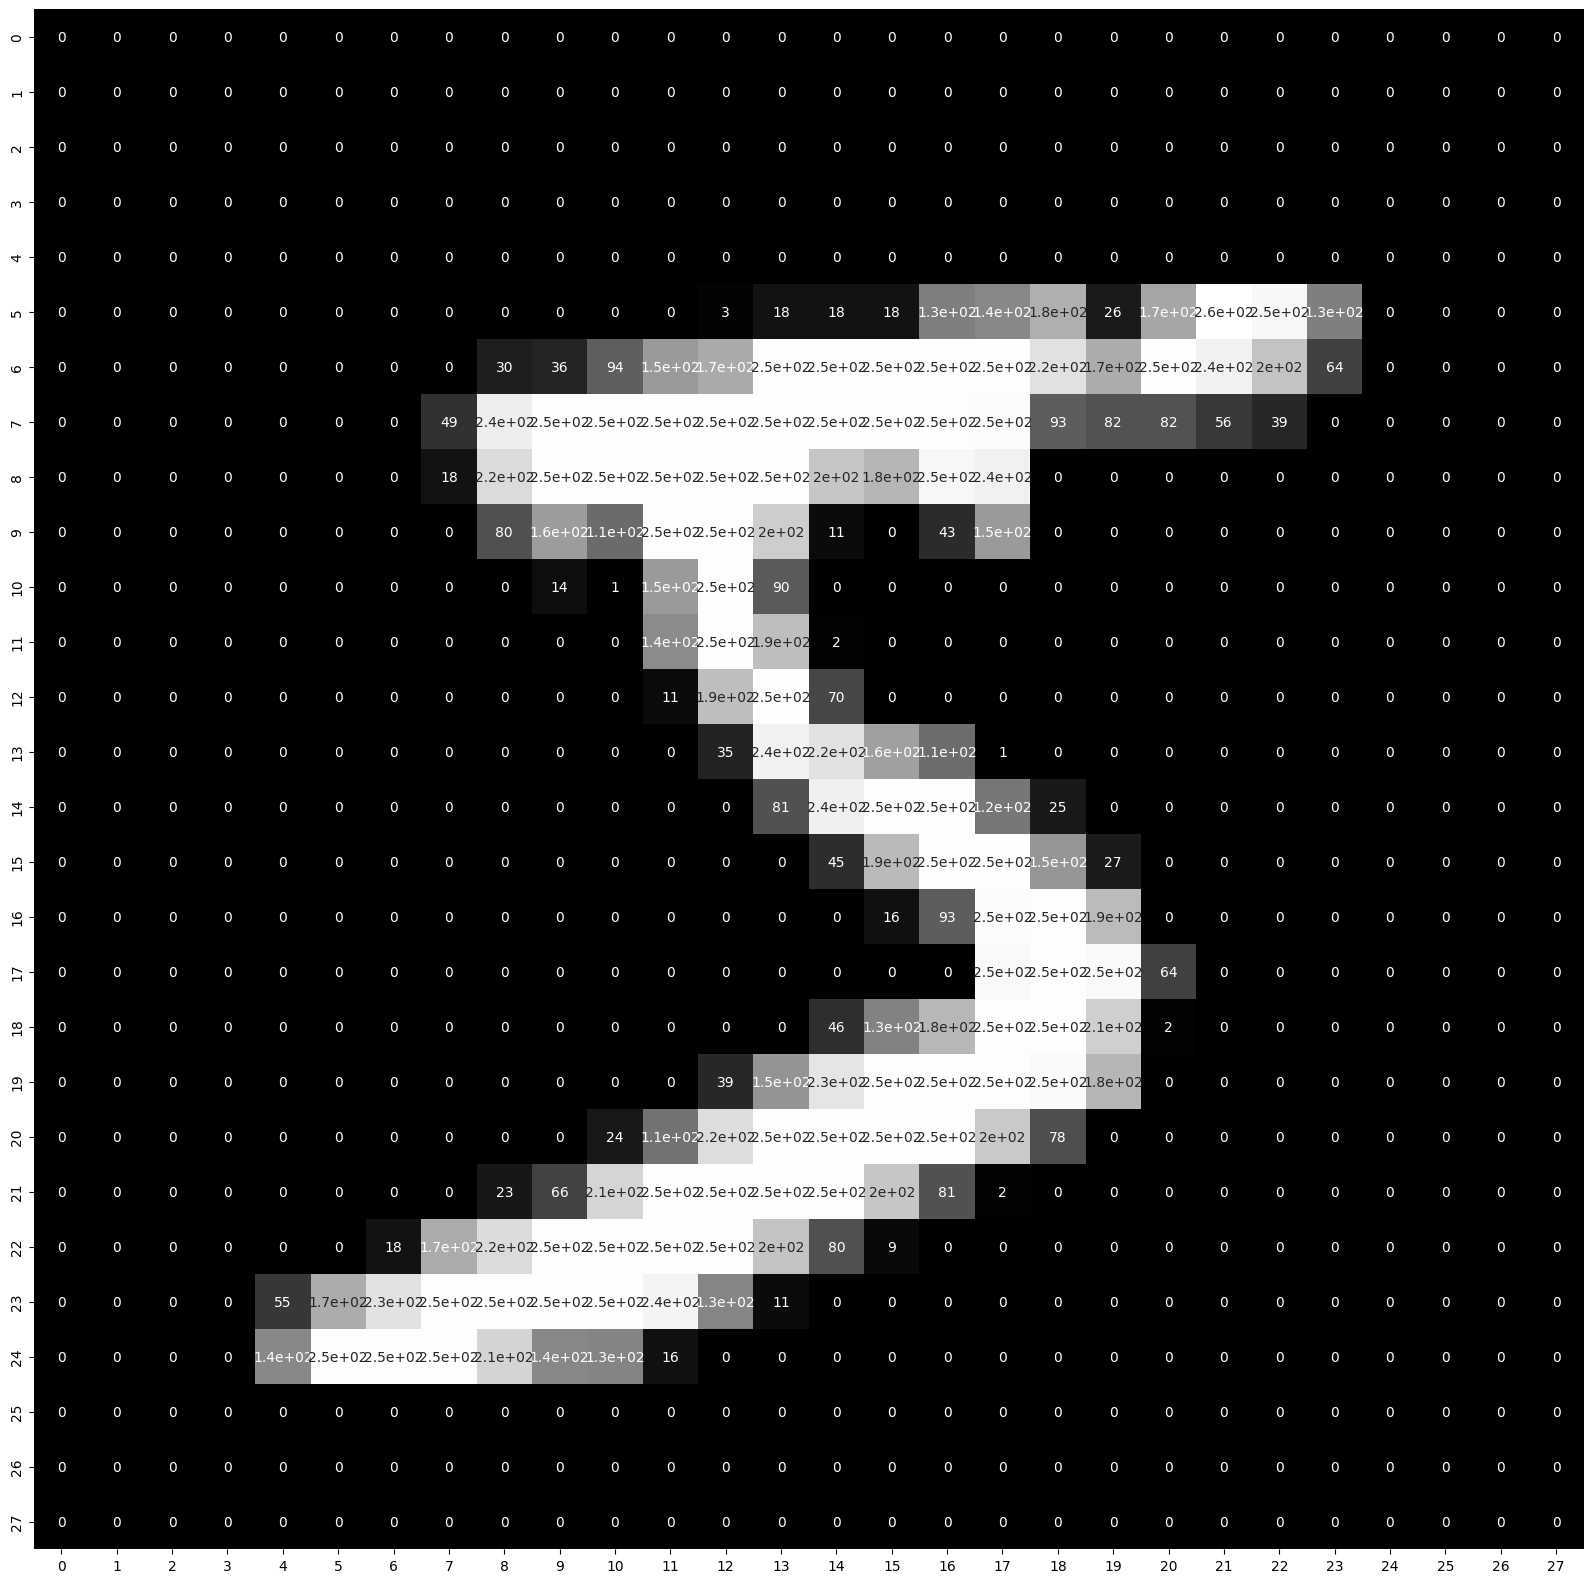

In [23]:
# Lets visualize above using heatmap.

plt.figure(figsize=(20, 20))
sns.heatmap(x_train[img_idx], annot=True, cmap="gray", cbar=False)
plt.show()

Lets understand above data. The first image, which is 5, has 28 rows and 28 columns. It is so because this is image size 28 X 28. Each value in the row,col is from 0-255, which is color range.

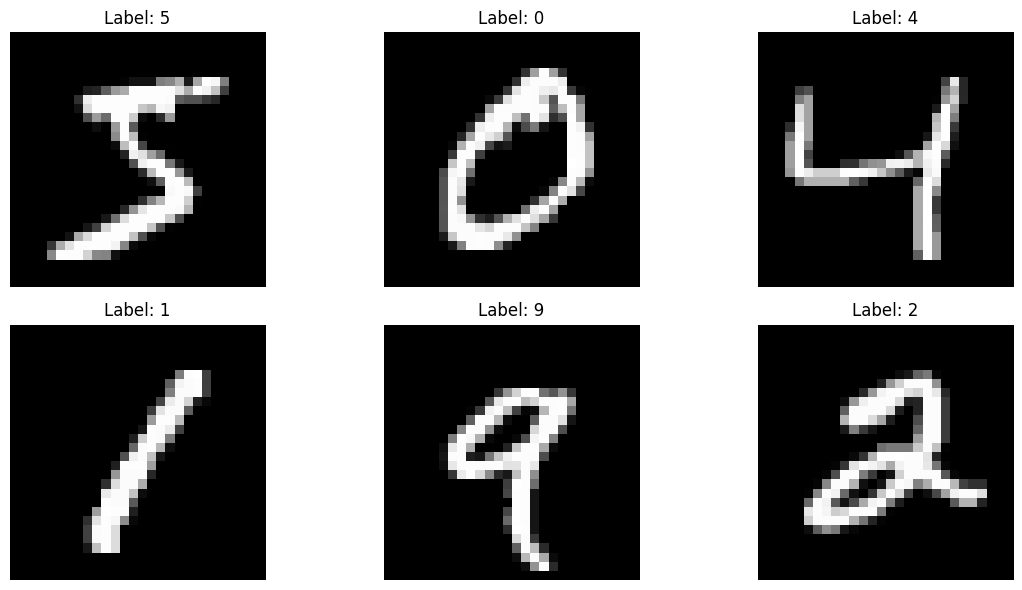

In [24]:
# Display the first 6 images with their labels
plt.figure(figsize=(12, 6))  # Set the figure size
for i in range(6):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for 6 images
    plt.imshow(x_train[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {y_train[i]}")  # Set the title as the label
    plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()

In [25]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include a channel dimension (required by Conv2D)
# Each image becomes (28, 28, 1) instead of (28, 28)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [40]:
df = pd.DataFrame(x_train[0].squeeze())  # Remove the extra dimension
print(df)

     0    1    2    3         4         5         6         7         8   \
0   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.117647   
7   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.192157  0.933333   
8   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.070588  0.858824   
9   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.313726   
10  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.0  0.0

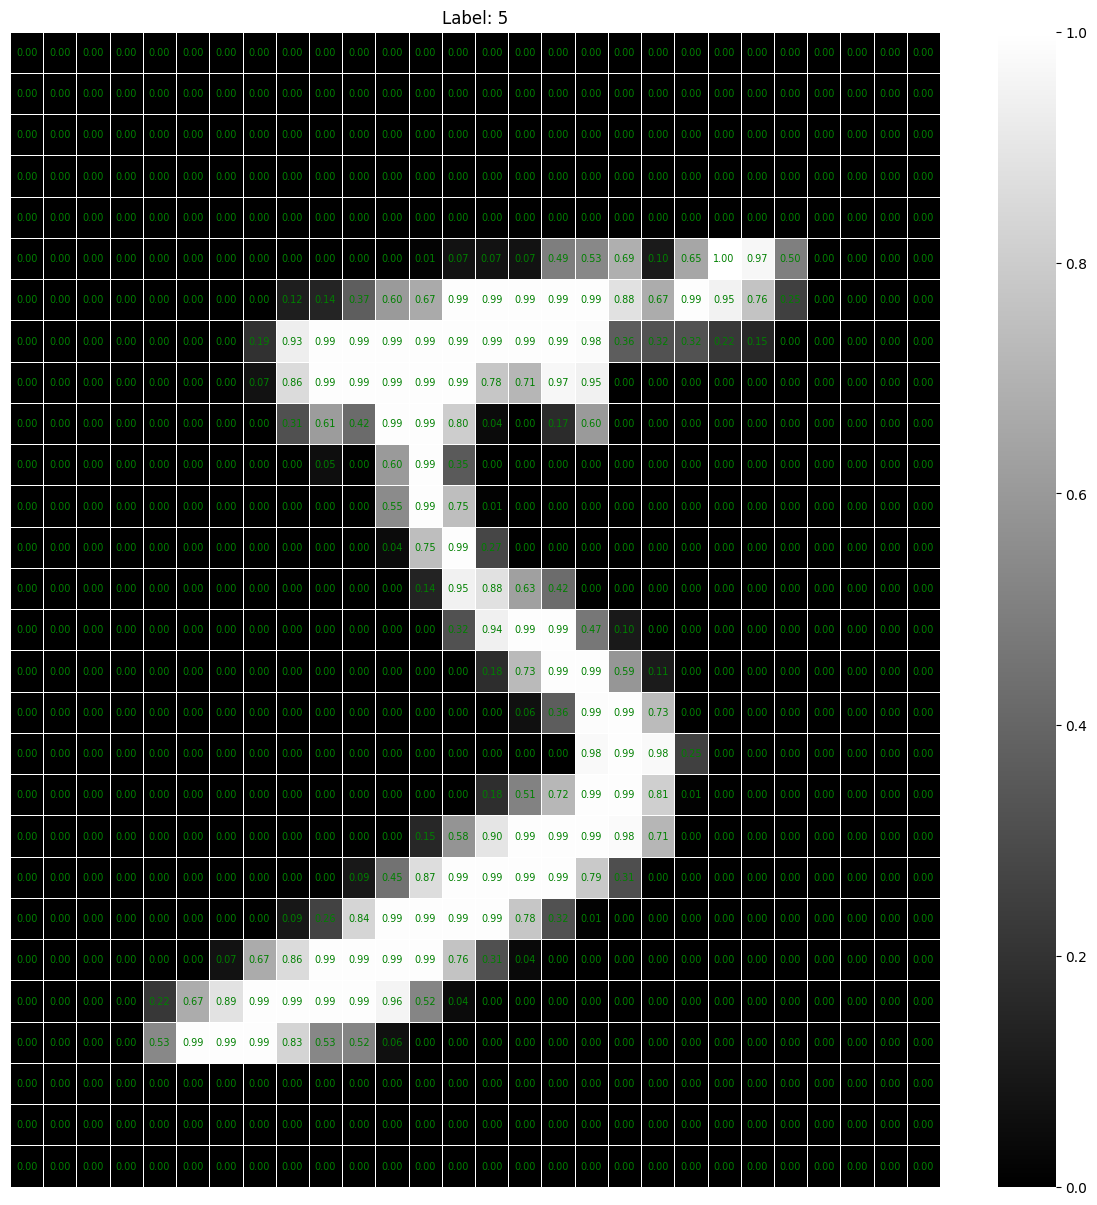

In [39]:
# Lets view the normailzed data.
# Extract the first image and remove the extra dimension at the end
image = x_train[0].squeeze()

plt.figure(figsize=(15, 15))
sns.heatmap(image, annot=True, fmt=".2f", cmap="gray", linewidths=0.5, cbar=True, 
            annot_kws={"size": 7, "color": "green"})  # Smaller font, red color for better contrast

plt.axis("off")  # Hide axis for clarity
plt.title(f"Label: {y_train[0]}")
plt.show()

In [41]:
# Step 2: Create the CNN model
# The model extracts features using convolutional layers, reduces dimensions using pooling, 
# and predicts digit classes using dense layers.
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),                                           # First pooling layer
    
    layers.Conv2D(64, (3, 3), activation='relu'),                          # Second convolutional layer
    layers.MaxPooling2D((2, 2)),                                           # Second pooling layer
    
    layers.Flatten(),                                                      # Flatten 3D features to 1D
    
    layers.Dense(64, activation='relu'),                                   # Fully connected layer, 64 neurons in hidden layer
    
    layers.Dense(10, activation='softmax')                                 # Output layer (10 classes)
])

model.summary()

c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## Details of Each Layer shown above
 
1. Input Layer
- Layer (Type): conv2d (2D Convolutional Layer)
- Output Shape: (None, 26, 26, 32)
- None: Refers to the batch size (dynamic).
- 26, 26: The spatial dimensions of the output feature map (reduced from 28x28 due to a 3x3 filter).
- 32: Number of filters in the layer.
- Param #: 320
Calculated as = (weights + biases) = (3 * 3 * 1 * 32) + 32 .

2. Pooling Layer
- Layer (Type): max_pooling2d
- Output Shape: (None, 13, 13, 32)
- Spatial dimensions are halved because of the 2x2 pooling window.
- Param #: 0 (No trainable parameters in pooling layers).

3. Second Convolutional Layer
- Layer (Type): conv2d_1
- Output Shape: (None, 11, 11, 64): Further reduced spatial dimensions due to another 3x3 filter.
- 64: Number of filters.
- Param #: 18,496
Calculated as (3 * 3 * 32 * 64) + 64.

and so on

## CNN model creation with simple use

Key Concepts to Teach:
1. Convolutional Layers:
- Learn spatial features from the images.
- The first layer has 32 filters of size 3×3, activated by ReLU.

2. Pooling Layers: Reduce spatial dimensions, making the model computationally efficient.

3. Flatten and Dense Layers:
- Flattening converts the 3D feature maps into a 1D vector.
- Dense layers classify the input into 10 classes (digits 0-9).

4. Normalization: Pixel values are scaled to [0, 1] to improve convergence.

5. Training and Validation: Explain the role of validation split to monitor the model's performance on unseen data.

6. Prediction Visualization: Plot the actual and predicted labels to demonstrate the model's performance.

In [43]:
# Step 3: Compile the model
# Use Sparse Categorical Crossentropy for multi-class classification
# Adam optimizer is widely used and efficient for CNNs
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
# Train on the training data and validate on a portion of it
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8930 - loss: 0.3432 - val_accuracy: 0.9865 - val_loss: 0.0463
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9840 - loss: 0.0500 - val_accuracy: 0.9872 - val_loss: 0.0440
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9897 - loss: 0.0330 - val_accuracy: 0.9878 - val_loss: 0.0424


313/313 - 1s - 4ms/step - accuracy: 0.9881 - loss: 0.0391
Test accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


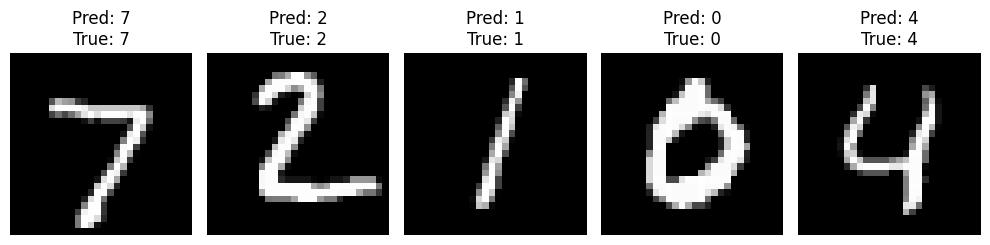

In [44]:
# Step 5: Evaluate the model
# Evaluate performance on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Step 6: Visualize predictions on test images
# Select the first 5 test images for prediction
predictions = model.predict(x_test[:5])
predicted_labels = predictions.argmax(axis=1)  # Get the predicted digit
true_labels = y_test[:5]  # Actual labels

# Plot the first 5 test images along with predicted and true labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')  # Remove the channel dimension for visualization
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Saving and Loading Models
Once a model is trained, you can save it to disk and load it later for inference or retraining.

Example:

In [45]:
# Save the model
model.save("model.keras")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9857 - loss: 0.0455
Loaded model test accuracy: 0.988099992275238


In [ ]:
# Load the model back
loaded_model = tf.keras.models.load_model("model.keras")

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print(f'Loaded model test accuracy: {test_acc}')